<a href="https://colab.research.google.com/github/aurora32s/python_study/blob/master/2022%EB%85%84_1%EC%9B%94_3%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 연산자 끼워넣기(14888번)

## 문제
N개의 수로 이루어진 수열 A1, A2, ..., AN이 주어진다. 또, 수와 수 사이에 끼워넣을 수 있는 N-1개의 연산자가 주어진다. 연산자는 덧셈(+), 뺄셈(-), 곱셈(x), 나눗셈(÷)으로만 이루어져 있다.

우리는 수와 수 사이에 연산자를 하나씩 넣어서, 수식을 하나 만들 수 있다. 이 떄, 주어진 수의 순서를 바꾸면 안된다.

예를 들어, 6개의 수로 이루어진 수열이 1,2,3,4,5,6이고, 주어진 연산자가 뎃셈(+1) 2개, 뺄셈(-) 1개, 곱셈(x) 1개, 나눗셈(÷) 1개인 경우에는 총 60가지의 식을 만들 수 있다. 예를 들어, 아래와 같은 식을 만들 수 있다.
- 1+2+3-4x5÷6
- 1÷2+3+4-5x6
- 1+2÷3x4-5+6
- 1÷2x3-4+5+6

식의 계산은 연산자 우선 순위를 무시하고 앞에서부터 진행해야 한다. 또 나눗셈은 정수 나눗셈으로 몫만 취한다. 음수를 양수로 나눌 때는 C++ 14의 기준을 따른다. 즉, 양수로 바꾼 뒤 몫을 취하고, 그 몫을 음수로 바꾼 것과 같다. 이에 따라서, 위의 식 4개의 결과를 계산해보면 아래와 같다.
- 1+2+3-4x5÷6 = 1
- 1÷2+3+4-5x6 = 12
- 1+2÷3x4-5+6 = 5
- 1÷2x3-4+5+6 = 7

N개의 수와 N-1개의 연산자가 주어졌을 때, 만들 수 있는 식의 결과가 최대인 것과 최소인 것을 구하는 프로그램을 작성하시오.

## 입력
첫째 줄에 수의 개수 N(2<=N<=11)가 주어진다. 둘째 줄에는 A1, A2, ..., A이 주어진다. (1<=Ai<=100) 셌재 줄에는 합이 N-1인 4개의 정수가 주어진다. 차례대로 뎃셈(+1)의 개수, 뺄셈(-)의 개수, 곱셈(x)의 개수, 나눗셈(÷)의 개수이다.

## 출력
첫째 줄에 만들 수 있는 식의 결과의 최댓값을, 둘째 줄에는 최솟값을 출력한다. 연산자를 어떻게 끼워넣어도 항상 -10억보다 크거나 같고, 10억보다 작거나 같은 결과가 나오는 입력만 주어진다. 또한, 앞에서부터 계산했을 때, 중간에 계산되는 식의 결과도 항상 -10억보다 크거나 같고, 10억보다 작거나 같다.

In [ ]:
n = int(input()) # 수의 개수
numbers = list(map(int, input().split())) # n개의 수
operator = list(map(int, input().split())) # 연산자의 개수

maxValue = int(1e9) * -1 - 1 # 최대값
minValue = int(1e9) + 1 # 최솟값

def calculator (a, b, index) : # 피연산자, 연산자 index
  if index == 0 : # 덧셈
    return a+b
  elif index == 1 : # 뺄셈
    return a-b
  elif index == 2 : # 곱셈
    return a*b
  else : # 나눗셈
    result = 0
    if a < 0 and b > 0 : result = (abs(a) // b) * -1
    else : result = a//b
    return result # 나눗셈(정수 나눗셈으로 몫만 취한다.)

def solve(result, index) : # 지금까지 결과, 숫자 index
  global maxValue, minValue
  if index == n : # 모든 숫자 계산 완료
    maxValue = max(maxValue, result)
    minValue = min(minValue, result)
    return
  
  for op in range(4) : # 각 연산자 중 개수가 1개 이상인 연산자만 계산 후 전달
    if operator[op] > 0 :
      operator[op] -= 1
      solve(calculator(result, numbers[index], op), index + 1)
      operator[op] += 1

solve(numbers[0], 1)
print(maxValue)
print(minValue)

2
5 6
0 0 1 0
30
30


In [ ]:
maxValue

54

In [ ]:
minValue

-24

# 괄호의 값(2504번)

## 문제
4개의 기호 '(', ')', '[', ']' 를 이용해서 만들어지는 괄호열 중에서 올바른 괄호열이란 다음과 같이 정의된다.
1. 한 쌍의 괄호로만 이루어진 '()'와 '[]'는 올바른 괄호열이다.
2. 만일 x가 올바른 괄호열이면 '(x)'이나 '[x]'도 모두 올바른 괋호열이 된다.
3. x와 y 모두 올바른 괄호열이라면 이들을 결합한 x,y도 올바른 괄호열이 된다.

예를 들어, '(()[[]])'나 '(())[][]'는 올바른 괄호열이지만 '([)]'나 '(()()[]'은 모두 올바른 괄호열이 아니다. 우리는 어떤 올바른 괄호열 x에 대하여 그 괄호열의 값(괄호값)을 아래와 같이 정의하고 값(x)로 표시한다.
1. '()'인 괄호열의 값은 2이다.
2. '[]'인 괄호열의 값은 3이다.
3. '(x)'의 괄호값은 2 * 값(x)으로 계산된다.
4. '[x]'의 괄호값은 3 * 값(x)으로 계산된다.
5. 올바른 괄호열 x와 y가 결합된 xy의 괄호값은 값(xy) = 값(x) + 값(y)로 계산된다.

예를 들어 '(()[[]])([])'의 괄호값을 구해보자. '()[[]]'의 괄호값이 2 + 3 * 3 = 11이므로 '(()[[]])'의 괄호값은 2 * 11 = 22이다. 그리고 '([])'의 값은 2 * 3 = 6이므로, 전체 괄호열의 값은 22 + 6 = 28이다.

여러분이 풀어야 할 문제는 주어진 괄호열을 읽고, 그 괄호값을 앞에서 정의한대로 계산하여 출력하는 것이다.

## 입력
첫째 줄에 괄호열을 나타내는 문자열(스트링)이 주어진다. 단 그 길이는 1이상, 30 이하이다.

## 출력
첫째 줄에 그 괄호열의 값을 나타내는 정수를 출력한다. 만일 입력이 올바르지 못한 괄호열이면 반드시 0을 출력해야 한다.


In [ ]:
l = input()

stack = list()
answer = 0
tmp = 1

for i in range(len(l)) :
  if l[i] == '(' :
    stack.append('(')
    tmp *= 2
  elif l[i] == '[' :
    stack.append('[')
    tmp *= 3
  elif l[i] == ')' :
    if not stack or stack[-1] == '[' :
      answer = 0
      break
    if l[i-1] == '(' : # 가장 안쪽 쌍에서만 answer에 더해준다.
      answer += tmp
    stack.pop()
    tmp //= 2
  elif l[i] == ']' :
    if not stack or stack[-1] == '(' :
      answer = 0
      break
    if l[i-1] == '[' : # 가장 안쪽 쌍에서만 answer에 더해준다.
      answer += tmp
    stack.pop()
    tmp //= 3

if stack :
  print(0)
else :
  print(answer)

[][]((])
0


# 빗물(14719번)

## 문제
2차원 세계에 블록이 쌓여있다. 비가 오면 블록 사이에 빗물이 고인다.

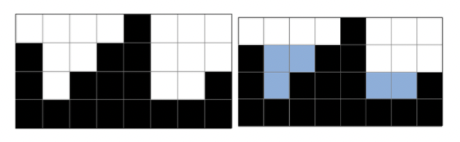

비는 충분히 많이 온다. 고이는 빗물의 총량은 얼마일까?

## 입력
첫 번째 줄에는 2차원 세계의 세로 길이 H와 2차원 세계의 가로길이 W가 주어진다. (1<=H,W<=500)

두 번쨰 줄에는 블록이 쌓인 높이를 의미하는 0이상 H 이하의 정수가 2차원 세계의 맨 왼쪽 위치부터 차례대로 W개 주어진다.

따라서 블록 내부의 빈 공간이 생길 수 없다. 또 2차원 세계의 바닥은 항상 막혀있다고 가정하여도 좋다.

## 출력
2차원 세계에서는 한 칸의 용량은 1이다. 고이는 빗물의 총량을 출력하여라. 빗물이 전혀 고이지 않을 경우 0을 출력하여라.

In [34]:
h, w = map(int, input().split()) # 높이, 넓이
heights = list(map(int, input().split())) # 각 높이

answer = 0
for i in range(1, w-1) :
  max_left = max(heights[:i])
  max_right = max(heights[i+1:])

  height = min(max_left, max_right)

  if heights[i] < height :
    answer += (height - heights[i])

print(answer)

3 5
0 0 0 2 0
0


In [35]:
heights

[0, 0, 0, 2, 0]

# 가르침(1062번)

## 문제
남극에 사는 김지민 선생님은 학생들이 되도록이면 많은 단어를 읽을 수 있도록 하려고 한다. 그러나 지구온난화로 인해 얼음이 녹아서 곧 학교가 무너지기 때문에, 김지민은 K개의 글자를 가르칠 시간 밖에 없다. 김지민이 가르치고 난 후에는, 학생들은 그 K개의 글자로만 이루어진 단어만을 읽을 수 있다. 김지민은 어떤 K개의 글자를 가르쳐야 학생들이 읽을 수 있는 단어의 개수가 최대가 되는지 고민에 빠졌다.

남극언어의 모든 단어는 "anta"로 시작되고, "tica"로 끝난다. 남극언어에 단어는 N개 밖에 없다고 가정한다. 학생들이 읽을 수 있는 단어의 최댓값을 구하는 프로그램을 작성하시오.

## 입력
첫쨰 줄에 단어의 개수 N과 K가 주어진다. N은 50보다 작거나 같은 자연수이고, K는 26보다 작거나 같은 자연수 또는 0이다. 둘째 줄부터 N개의 줄에 남극 언어의 단어가 주어진다. 단어는 영어 소문자로만 이루어져 있고, 길이가 8보다 크거나 같고, 15보다 작거나 같다. 모든 단어는 중복되지 않는다.

## 출력
첫째 줄에 김지민이 K개의 글자를 가르칠 떄, 학생들이 읽을 수 있는 단어의 개수의 최댓값을 출력한다.

## [ 배열 사용하면 시간 초과 발생 ]
1. int형은 4byte(=32bit) 이므로 0부터 (2^32 - 1)까지 표현할 수 있다. -> 비트마스크 사용 시, int로 커버 가능

2. 비트마스크를 이용한 집합 구현
- 하나의 bit가 하나의 원소를 의미
- N bit 정수 변수라면 N개의 원소를 갖는 집합의 부분집합들을 모두 표현할 수 있다.

(1) 공집합 : a = 0

(2) 꽉찬 집합 : a = (1<<n)-1

(3) 원소 추가 : a |= (1<<k)

(4) 원소 삭제 : a &= ~(1<<k)

(5) 원소의 포함 여부 확인 : if (a & (1<<k))

(6) 원소의 토글 : a ^= (1<<k)

(7) 두 집합에 대해서 연산
  - a|b : 합집합
  - a&b : 교집합
  - a&(~b) : 차집합
  - a^b : a와 b중 하나에만 포함된 원소들의 집합

(8) 집합의 크기 구하기
  - java : Integer.bitCount(A)

(9) 최소 원소 찾기 : int first = a & (-a)

(10) 최소 원소 지우기 : a &= (a-1)

(11) 모든 부분 집합 순회하기
  - for (int subset = a ; subset ; subset = ((subset-1)&a)){}

In [13]:
from itertools import combinations

n, k = map(int, input().split()) # 단어의 개수, 배울 수 있는 알파벳의 개수

if k < 5 :
  print(0)
else :
  k -= 5
  need_chars = {'a','n','t','i','c'}
  input_chars = []
  alphabet = {ky : v for v, ky in enumerate(
      (set(map(chr, range(ord('a'), ord('z') + 1))) - need_chars))}
  
  answer = 0
  for _ in range(n) :
    tmp = 0
    for c in set(input()) - need_chars :
      tmp |= (1 << alphabet[c]) # 각 알파벳에 해당하는 bit를 켜준다.
    input_chars.append(tmp) # 비트마스크 저장
  
  filter = (2**i for i in range(21)) # 26개 알파벳에서 필수 5개를 제외
  count = 0
  for comb in combinations(filter, k) : # filter에서 k개의 원소만 뽑아낸 모든 조합
    test = sum(comb) # 새롭게 배운 알파벳의 조합(비트마스크)
    count = 0
    for word in input_chars :
      if test & word == word : # 해당 단어의 포함된 bit가 모두 test에 있다면
        count += 1
    
    answer = max(answer, count)
  print(answer)

9 8
antabtica
antaxtica
antadtica
antaetica
antaftica
antagtica
antahtica
antajtica
antaktica
3
